## Full model cross-lingual representation similarity

Similarity of full vs full model one language:
- take finetuned model representation of english, full model representation of english
- over layers, compute SVCCA and CKA scores
- do this for a english and other language pairs

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import os
import torch

PATH_TO_ENCODINGS = "encodings/encodings/"

full_sub = {
    "en": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/en.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/en.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/en.pt")
        ),
    },
    "es": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/es.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/es.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/es.pt")
        ),
    },
    "ar": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/ar.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/ar.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/ar.pt")
        ),
    },
    "de": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/de.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/de.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/de.pt")
        ),
    },
    "hi": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/hi.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/hi.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/hi.pt")
        ),
    },
    "ru": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/ru.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/ru.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/ru.pt")
        ),
    },
    "zh": {
        "base": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_BASE/zh.pt")
        ),
        "full": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.XLMR_MLM_FINETUNED/zh.pt")
        ),
        "sub": torch.load(
            os.path.join(PATH_TO_ENCODINGS, "Experiments.EN_SUB_MLM_FINETUNED/zh.pt")
        ),
    },
}

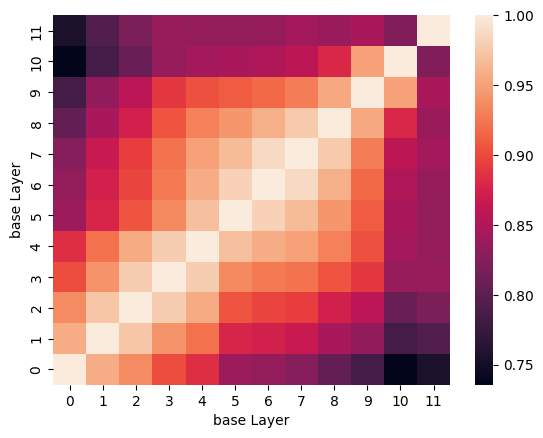

In [ ]:
from cross_lingual_subnets.visualization import cka_cross_layer

# Sanity check: is the same model similar to itself?
cka_cross_layer(
    full_sub["en"]["base"], full_sub["en"]["base"], xlabel="base", ylabel="base"
)

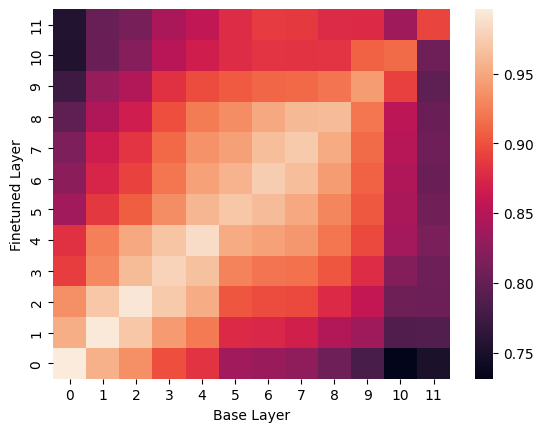

In [ ]:
cka_cross_layer(
    full_sub["en"]["base"],
    full_sub["en"]["full"],
    xlabel="Base",
    ylabel="Finetuned",
    savename="cka_base_vs_finetuned.pdf",
)

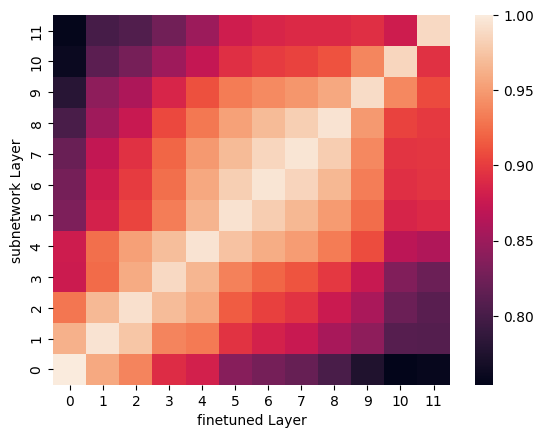

In [ ]:
cka_cross_layer(
    full_sub["en"]["full"],
    full_sub["en"]["sub"],
    xlabel="finetuned",
    ylabel="subnetwork",
    savename="cka_en_full_vs_sub.pdf",
)

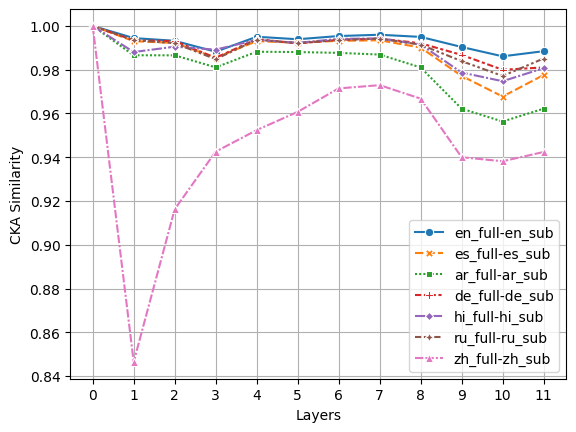

In [4]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

cka_layer_by_layer(
    full_sub=full_sub,
    savename="cka_full_vs_sub.pdf",
    # title="Full vs subnetwork similarity over layers",
)

## Similarity scores over layers for different languages

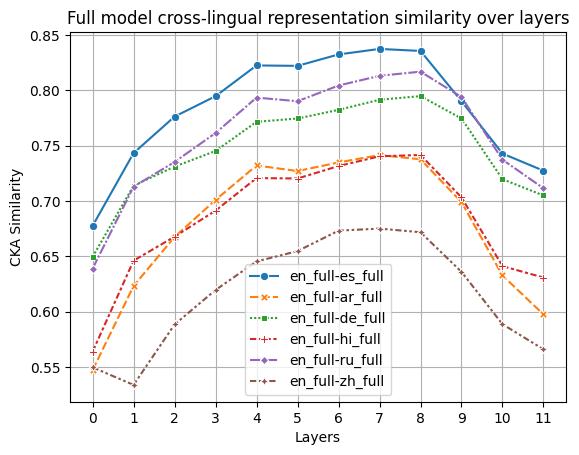

In [83]:
from cross_lingual_subnets.visualization import cka_layer_by_layer_langs

full_full_df = cka_layer_by_layer_langs(
    full_sub=full_sub,
    source="en",
    exp_name1="full",
    exp_name2="full",
    savename="cka_en_other_langs_full.pdf",
    title="Full model cross-lingual representation similarity over layers",
)

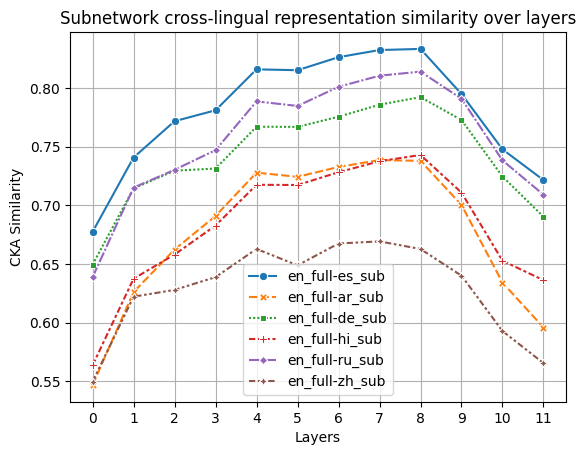

In [84]:
full_sub_df = cka_layer_by_layer_langs(
    full_sub=full_sub,
    source="en",
    exp_name1="full",
    exp_name2="sub",
    savename="cka_en_other_langs_sub.pdf",
    title="Subnetwork cross-lingual representation similarity over layers",
)

In [85]:
diff_df = (full_full_df.to_numpy() - full_sub_df.to_numpy()).T

In [86]:
new_df = pd.DataFrame()
for i, col in enumerate(full_sub_df):
    new_df[col] = diff_df[i]

In [89]:
new_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
en_full-es_sub,0.0,0.002530,0.004581,0.013730,0.006653,0.007030,0.006252,0.005154,0.002373,-0.004618,-0.004894,0.005852
en_full-ar_sub,0.0,-0.002965,0.005111,0.009969,0.004220,0.002760,0.002146,0.002940,-0.000201,-0.001428,-0.001510,0.001535
en_full-de_sub,0.0,-0.000623,0.001524,0.013842,0.004611,0.007722,0.006856,0.005752,0.002620,0.001879,-0.004830,0.014672
en_full-hi_sub,0.0,0.008585,0.009627,0.008482,0.003200,0.002990,0.003366,0.002804,-0.001344,-0.007613,-0.011723,-0.005512
en_full-ru_sub,0.0,-0.002189,0.004990,0.014401,0.004873,0.005515,0.003369,0.002699,0.002984,0.003179,-0.000939,0.002396
en_full-zh_sub,0.0,-0.088566,-0.039663,-0.019329,-0.017570,0.005818,0.005698,0.005733,0.008936,-0.004173,-0.004328,0.000345


[2024-05-23 14:48:40,891] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-23 14:48:40,900] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-23 14:48:40,946] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-23 14:48:40,950] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to

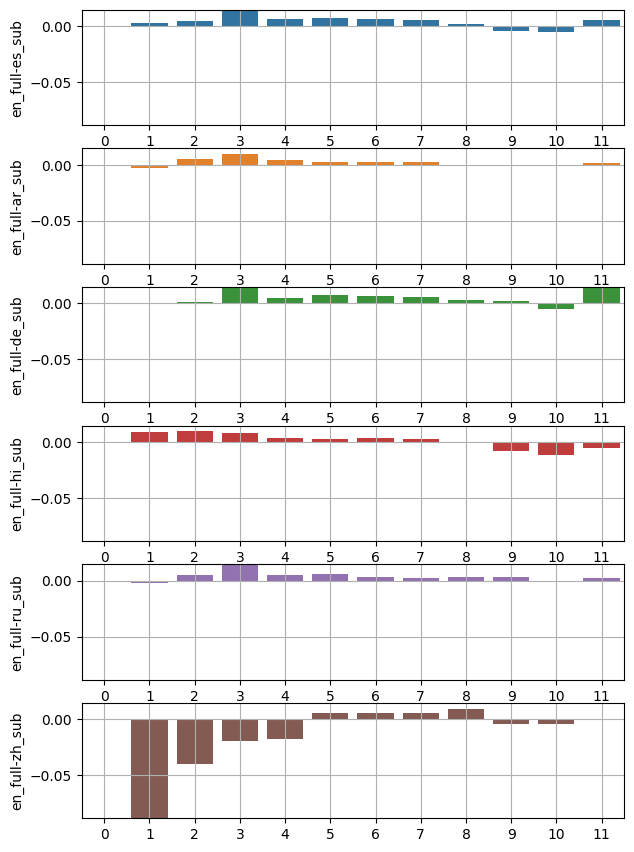

In [95]:
from cross_lingual_subnets.visualization import cka_diff_barplots

cka_diff_barplots(new_df.T, savename="cka_difference_barplots.pdf")

## Heatmaps of representations base vs finetuned models for different languages

/home/paulius/personal/pycharm-projects/cross-lingual-subnetworks/cross_lingual_subnets/visualization.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 1])


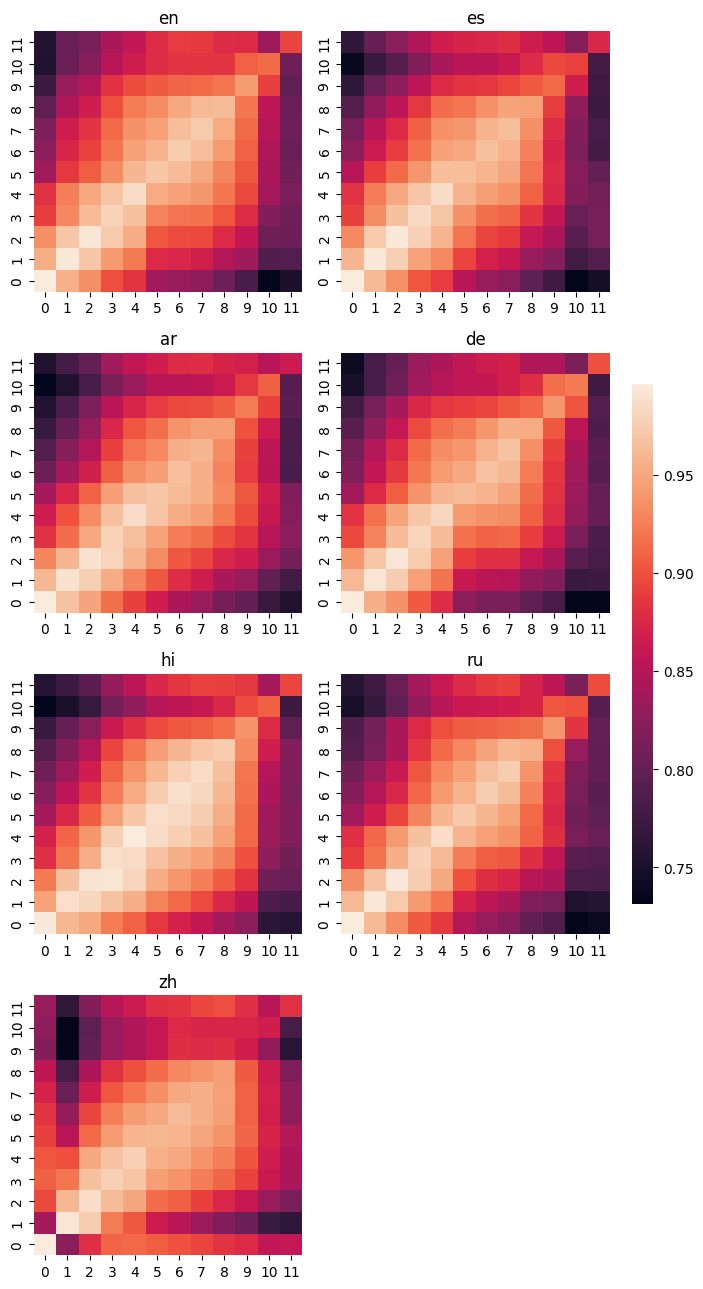

In [9]:
from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

cka_cross_layer_all_languages(
    full_sub=full_sub,
    xlabel="Base",
    ylabel="Full",
    exp_name1="base",
    exp_name2="full",
    savename="cka_base_vs_finetuned_all_langs.pdf",
)

## Heatmaps of representations finetuned models vs subnetworks different languages

In [4]:
from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

cka_cross_layer_all_languages(
    full_sub=full_sub,
    xlabel="Full",
    ylabel="Subnetwork",
    exp_name1="full",
    exp_name2="sub",
    savename="cka_full_vs_sub_all_langs.pdf",
)

In [ ]:
pd.DataFrame({"en_full-en_sub"})